### CNN
* http://andrew.gibiansky.com/blog/machine-learning/convolutional-neural-networks/
* http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/
* https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721
* https://algotravelling.com/ru/%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D1%8D%D1%82%D0%BE-%D0%B2%D0%B5%D1%81%D0%B5%D0%BB%D0%BE-3/
* https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/
* https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b
* https://github.com/udsclub/images-classification-caltech
* https://www.asozykin.ru/courses/nnpython

### Preprocessing
* https://www.embedded-vision.com/sites/default/files/apress/computervisionmetrics/chapter2/9781430259299_Ch02.pdf
* https://datascience.stackexchange.com/questions/5224/how-to-prepare-augment-images-for-neural-network
* https://www.quora.com/What-are-some-ways-of-pre-procesing-images-before-applying-convolutional-neural-networks-for-the-task-of-image-classification
* http://cs231n.github.io/neural-networks-2/#datapre
* http://www.robots.ox.ac.uk/~vgg/practicals/cnn/#getting-started
* https://www.safaribooksonline.com/library/view/programming-computer-vision/9781449341916/ch01.html
* https://stackoverflow.com/a/10169025/5151861
* augmentation tf+keras http://machinelearningmastery.com/image-augmentation-deep-learning-keras/

#### Augmentation
* rotation: random with angle between 0° and 360° (uniform)
* translation: random with shift between -10 and 10 pixels (uniform)
* rescaling: random with scale factor between 1/1.6 and 1.6 (log-uniform)
* flipping: yes or no (bernoulli)
* shearing: random with angle between -20° and 20° (uniform)
* stretching: random with stretch factor between 1/1.3 and 1.3 (log-uniform)
* https://www.tensorflow.org/api_docs/python/tf/image
* https://github.com/aleju/imgaug
* http://augmentor.readthedocs.io/en/master/
* https://github.com/analysiscenter/dataset

* Gaussian blurring of images
* Morphology—Counting Objects

Ресайзинг - важно
* http://ufldl.stanford.edu/wiki/index.php/UFLDL_Tutorial

* одну- дву- слойную cnn
* графики ошибки
* 224х224
* 32х32
* в керас
* серые картинки 
* тензор борд
* презентация по аугментации

whitening

In [407]:
from scipy import ndimage
import numpy as np
import pandas as pd
import os
from IPython.display import display, Image
from scipy import misc
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow
from sklearn.model_selection import train_test_split

%matplotlib inline

In [408]:
pixel_depth = 255.0 # number of levels per pixel
num_classes = 257 # number of total classes
test_folder = 'data/test' # dir, where test set is placed
train_folder = 'data/train' # dir, where train set is placed

In [409]:
def reshape(img):
    nsamples, nx, ny = img.shape
    return img.reshape((nsamples,nx*ny))

In [ ]:
def load_test_set():
    num_images = 0
    images = os.listdir(test_folder)
    test_set = []
    for image in images:
        image = os.path.join(test_folder, image)
        test_set.append(io.imread(image))
    return test_set

In [ ]:
test_set = load_test_set()

In [502]:
def load_train_set(df):
    folders = os.listdir(train_folder)
    for ind, folder in enumerate(folders):
        #if ind % 60 == 0:
            folder = os.path.join(train_folder, folder)
            print('{}'.format(folder))
            if os.path.isdir(folder):
                image_files = os.listdir(folder)
                for image_file in image_files:
                    if not image_file.startswith('.'):
                        image = misc.imread(os.path.join(folder, image_file))
                        category = folder[15:]
                        width = image.shape[0]
                        height = image.shape[1]
                        #target = folder.split('.')[0].split('/')[2]
                        target = int(folder.split('.')[0].split('/')[2])
                        df.loc[df.shape[0]]=[category, image_file, width, height, image.dtype, target]

In [454]:
df = pd.DataFrame(columns = ['category', 'image_name', 'width', 'height', 'type', 'target'])

In [457]:
%%time
train_set = load_train_set(df)

data/train/.DS_Store
data/train/001.ak47
data/train/002.american-flag
data/train/003.backpack
data/train/004.baseball-bat
data/train/005.baseball-glove
data/train/006.basketball-hoop
data/train/007.bat
data/train/008.bathtub
data/train/009.bear
data/train/010.beer-mug
data/train/011.billiards
data/train/012.binoculars
data/train/013.birdbath
data/train/014.blimp
data/train/015.bonsai-101
data/train/016.boom-box
data/train/017.bowling-ball
data/train/018.bowling-pin
data/train/019.boxing-glove
data/train/020.brain-101
data/train/021.breadmaker
data/train/022.buddha-101
data/train/023.bulldozer
data/train/024.butterfly
data/train/025.cactus
data/train/026.cake
data/train/027.calculator
data/train/028.camel
data/train/029.cannon
data/train/030.canoe
data/train/031.car-tire
data/train/032.cartman
data/train/033.cd
data/train/034.centipede
data/train/035.cereal-box
data/train/036.chandelier-101
data/train/037.chess-board
data/train/038.chimp
data/train/039.chopsticks
data/train/040.cockroac

In [463]:
df.to_csv('data/train_data')

### Classes distribution

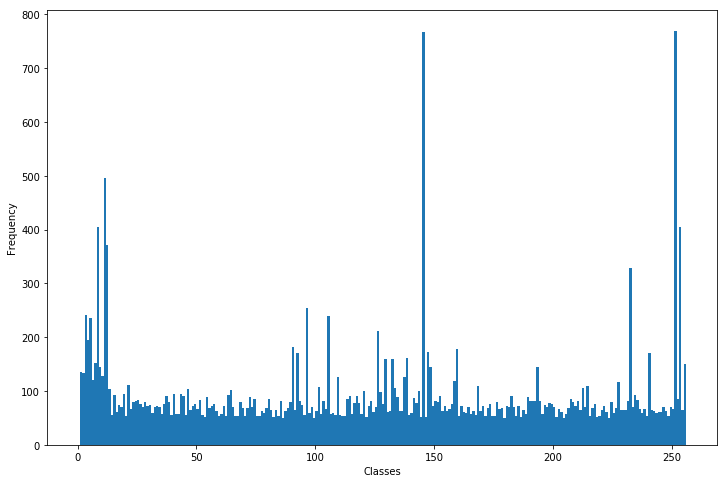

In [415]:
plt.figure(figsize=(12, 8))
plt.hist(df['target'], bins=range(len(df['target'].unique())))
plt.xlabel('Classes')
plt.ylabel('Frequency');

In [425]:
df = pd.read_csv('train_data', index_col=0)

In [416]:
y = df['target']
X = df.copy()
X.drop('target', axis=1, inplace=True)
df.to_csv('train_data')

In [281]:
X.to_csv('data/train_features')
y.to_csv('data/train_target')

In [428]:
def check_dir(directory):
    if not os.path.exists(directory):
        create_dir(directory)

In [429]:
def create_dir(directory):
    os.makedirs(directory)

In [381]:
def norm(img):
    return img / 255.0

In [484]:
transform_folder = 'data/transformed'
def transform_train_set(img_size=(32, 32)):
    check_dir(transform_folder)
    folders = os.listdir(train_folder)
    for ind, folder in enumerate(folders):
        #if ind % 60 == 0:
            subfolder = os.path.join(train_folder, folder)
            if os.path.isdir(subfolder):
                print('subfolder {}'.format(folder))
                for image_file in os.listdir(subfolder):
                    if not image_file.startswith('.'):
                        name = os.path.join(subfolder, image_file)
                        image = misc.imread(name)
                        if len(image.shape) == 2:
                            image = np.stack((image,)*3)
                        image = misc.imresize(image, img_size)
                        image = norm(image)
                        fold_to_save = os.path.join(transform_folder, image_file)
                        misc.imsave(fold_to_save, image, interp='bicubic')

In [469]:
%%time
img_size = (64,64)
transform_train_set(img_size)

subfolder 001.ak47
before  (180, 436)
after  (3, 180, 436)
subfolder 002.american-flag
subfolder 003.backpack
subfolder 004.baseball-bat
subfolder 005.baseball-glove
subfolder 006.basketball-hoop
before  (498, 500)
after  (3, 498, 500)
before  (247, 240)
after  (3, 247, 240)
before  (330, 231)
after  (3, 330, 231)
subfolder 007.bat
before  (449, 450)
after  (3, 449, 450)
subfolder 008.bathtub
before  (240, 169)
after  (3, 240, 169)
subfolder 009.bear
subfolder 010.beer-mug
subfolder 011.billiards
subfolder 012.binoculars
subfolder 013.birdbath
before  (300, 204)
after  (3, 300, 204)
subfolder 014.blimp
before  (477, 595)
after  (3, 477, 595)
subfolder 015.bonsai-101
subfolder 016.boom-box
subfolder 017.bowling-ball
before  (265, 213)
after  (3, 265, 213)
subfolder 018.bowling-pin
subfolder 019.boxing-glove
subfolder 020.brain-101
before  (216, 300)
after  (3, 216, 300)
before  (249, 300)
after  (3, 249, 300)
before  (249, 300)
after  (3, 249, 300)
before  (225, 300)
after  (3, 225, 300

before  (243, 360)
after  (3, 243, 360)
subfolder 147.mushroom
before  (334, 500)
after  (3, 334, 500)
subfolder 148.mussels
before  (223, 340)
after  (3, 223, 340)
subfolder 149.necktie
subfolder 150.octopus
subfolder 151.ostrich
subfolder 152.owl
subfolder 153.palm-pilot
before  (364, 387)
after  (3, 364, 387)
before  (185, 174)
after  (3, 185, 174)
subfolder 154.palm-tree
subfolder 155.paperclip
before  (206, 371)
after  (3, 206, 371)
before  (270, 203)
after  (3, 270, 203)
before  (215, 300)
after  (3, 215, 300)
before  (164, 225)
after  (3, 164, 225)
before  (219, 256)
after  (3, 219, 256)
before  (350, 257)
after  (3, 350, 257)
before  (400, 400)
after  (3, 400, 400)
before  (256, 246)
after  (3, 256, 246)
subfolder 156.paper-shredder
subfolder 157.pci-card
subfolder 158.penguin
subfolder 159.people
before  (262, 308)
after  (3, 262, 308)
before  (240, 384)
after  (3, 240, 384)
before  (600, 480)
after  (3, 600, 480)
before  (278, 204)
after  (3, 278, 204)
before  (288, 187)
afte

before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)
before  (197, 300)
after  (3, 197, 300)


In [489]:
train_df = pd.DataFrame(columns=['X', 'y'])

,X,y


In [506]:
for index, image_name in enumerate(os.listdir(transform_folder)):
    if index % 3000 == 0:
        print('{}'.format(index))
    image = os.path.join(transform_folder, image_name)
    X = misc.imread(image).flatten('C')
    y = df.loc[df['image_name'] == image_name, 'target'].iloc[0]
    train_df.loc[train_df.shape[0]]=[X, y]

0
3000
6000
9000
12000
15000
18000
21000


In [505]:
train_df.to_csv('train_transformed_df.csv')

In [513]:
X = train_df['X']
y = train_df['y']

In [514]:
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [509]:
from sklearn.linear_model import LogisticRegression  # baseline classifier
from sklearn.decomposition import PCA # to reduce training columns
from sklearn.pipeline import Pipeline # to "glue" model steps/components together
from sklearn.metrics import accuracy_score # to test quality of the classifier

In [515]:
pca = PCA(n_components=50, random_state=42)
svc = LogisticRegression(random_state=42, 
                         C=0.1, 
                         max_iter=50, 
                         verbose=2, 
                         n_jobs=-1,
                         class_weight='balanced'
                        )

In [516]:
svc.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [533]:
%%time
# load data in flattened form

# img parameters
img_shape = (64, 64)
channels = 3
img_shape_flattened = img_shape[0] * img_shape[1] * channels
#img_qty = len(train_metadata)
img_dtype = np.int8

# initialize X,y
#X = np.empty(shape=(img_qty, img_shape_flattened), dtype=img_dtype)
#y = np.empty(shape=(img_qty,), dtype=np.uint16)

train_df1 = pd.DataFrame(columns=['X', 'y'])
# read images
for i,f_name in enumerate(os.listdir(transform_folder)):
    if i % 5000 == 0:
        print('{:6d} images loaded'.format(i))
    
    img_path = os.path.join(transform_folder, f_name)
    X = misc.imread(image).flatten('C')
    y = df.loc[df['image_name'] == f_name, 'target'].iloc[0]
    train_df1.loc[train_df.shape[0]]=[X, y]

     0 images loaded
  5000 images loaded
 10000 images loaded
 15000 images loaded
 20000 images loaded
CPU times: user 2min 11s, sys: 2.25 s, total: 2min 13s
Wall time: 2min 19s


In [534]:
X = train_df1['X']
y = train_df1['y']

In [535]:
y

44202    257
Name: y, dtype: object

In [527]:
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size = 0.3, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.